# Animation in Julia. 

Animated plots in Julia can be created using the matplotlib tools that we know from Python.

The idea is the same. There are three steps to creating an object that will contain the animation:
- draw the empty figure
- define an init function, and an animate function, that will draw the successive frames
- create the animation using the FuncAnimation fucntion (which calls init and animate)

This object is then saved as an MP4 file, which can then be played in the notebook using an html command.

For more ideas on animation, take a look here: 
 http://nbviewer.jupyter.org/github/tom26/JuliaFun/blob/master/2D%203-Body%20Problem.ipynb

Let's do a simple animation, drawing 3 lines across a plot. 

First, tell Julia the tools we need to load in:

In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

We first construct the empty figure. For convenience, we define 3 global data structures called lines. 

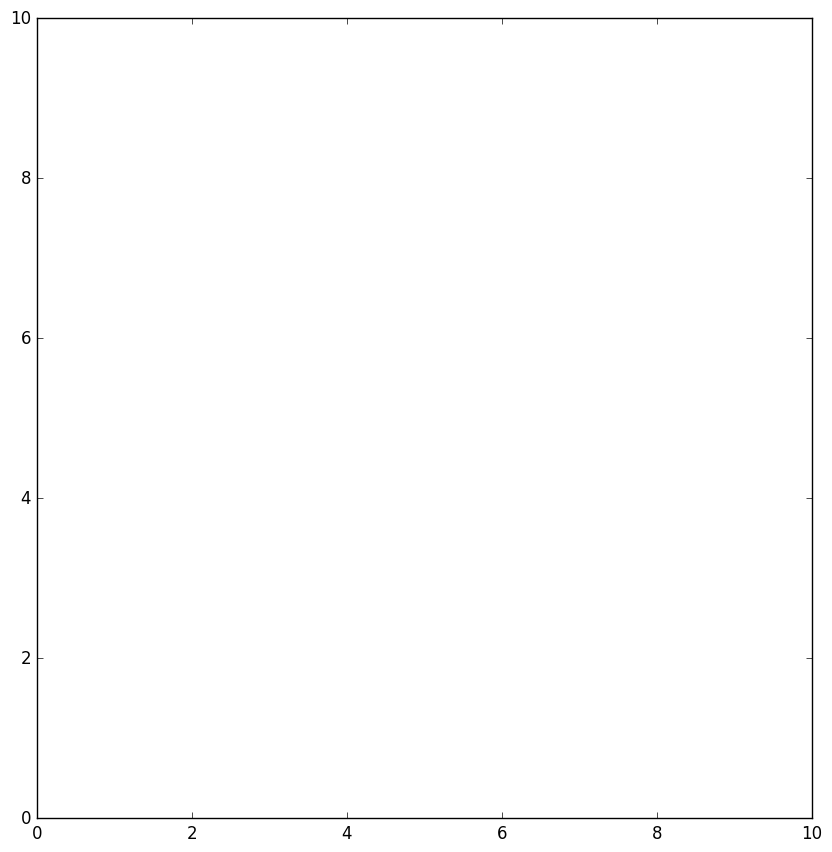

PyObject <matplotlib.lines.Line2D object at 0x7f3be6f4d2e8>

In [2]:
#Construct Figure and Plot Data
fig = figure("MyFigure",figsize=(10,10))
ax = axes(xlim = (0,10),ylim=(0,10))
global line1 = ax[:plot]([],[],"r-")[1]
global line2 = ax[:plot]([],[],"g-")[1]
global line3 = ax[:plot]([],[],"b-")[1]

We now define the init function, which sets the data for the first frame

In [3]:
# Define the init function, which draws the first frame (empty, in this case)
function init()
    global line1
    global line2
    global line3
    line1[:set_data]([],[])
    line2[:set_data]([],[])
    line3[:set_data]([],[])
    return (line1,line2,line3,Union{})  # Union{} is the new word for None
end

init (generic function with 1 method)

Next is the animation function, which will draw each frame of the animation using index i.

In this case, we just draw three lines. The first is along the line x=y, going from point (0,0) to (i/10,i/10).

In [4]:
# animate draws the i-th frame, where i starts at i=0 as in Python
function animate(i)
    global line1
    global line2
    global line3
    x = (0:i)/10.0
    line1[:set_data](x,x)
    line2[:set_data](1+x,x)
    line3[:set_data](2+x,x)
    return (line1,line2,line3,Union{})
end

animate (generic function with 1 method)

Now we create the animation object by calling the Python function FuncAnimaton.

In [5]:
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)

PyObject <matplotlib.animation.FuncAnimation object at 0x7f3be65cc5c0>

This is converted to an MP4 movie file and saved on disk in this format.

In [6]:
myanim[:save]("3Lines.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

Finally, we display the movie in a Julia cell as follows. Note it has animation controls for the user. 

In [7]:
# Function for creating an embedded video given a filename
function html_video(filename)
    base64_video = base64encode(open(readbytes, filename))
	"""<video controls src="data:video/x-m4v;base64,$base64_video">"""
end

display("text/html", html_video("3Lines.mp4"))

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAbXJtZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTYgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAgeZYiEAC///vau/MsrRwuVLh1Ze7NR8uhJcv2IMH1oAAADAAADAAADAAARcwILGC2WPLNIAAADAACDAAdIARAAMZcvgbcYgGoCSCjVYEmSxBILYP4HUejxz/eZgmDXS2AQUvUC9gD9ViSoLw1eowPoStFvHKiSTwfynwqSrAANqPBxdrHn/1pVkLXLOPMgxxMxkcS2KfpFFKM7+AbK77i3q+VU74cqMmDBJ5dCFnuU1fFEeqWEY1c3UhT8EMoP3kZTpQg3k2rRg3dJfIZcT8Fd3gXe3yGCuNGJcb83EDvQoD9zr1jS+1xgL3XOSd8LmBYQxnYY6tBtCV6zFhkKHI2pkAouZibqj/d0WHrU2Sr/PG7GlkpRcES7JHoTtlQYIaQMVz8RAREMwNG3hAIuSjLm4Ky8oXS++cMpWo387YguAjteNfhpdCsYF0SXRUvF4llEB/dXbxpn+kbQgmmpWBjBg9JKshHVDXhSUlmLLHZWZZ5HCJUx3p6xOfoB/DikW1Kez1dX6dyOxL+VwADNR1og6QAAAwAKAAAFcAAAAwAAAwAAAwAAAwAAAwAEqqs/23G5W066TvfPx14DaZv3i00VFftIV1ka1k7aBwGF36cmq/GvjmAAADcWT2KfparqHhZHJ4DmmCNA3oHRq0JTSjxTPQCr2+x/zMSSNEv+b5eDOQbR+ddWrR9IYs/yMstLEgJw30r2OH5VHWwXDpVBmrvPchEZ2q2jr8ZD/+6kMArgzJ4LH2GQkPt2hUNuYAAAFDzzVbLP2CjNZdWuA4gx8+sfvZhDj6qai9x1nEAAItsY0AEAVwAFDqoAOWhAA5s0AIjaAAADAAADAAe4C1iL4PYwZT7N3TL9F/raOdkkP4Wtldb04/aTgrEyceIM1I/REwAIPQmHX7MgZc0gtTSjuF/35J8RC6e7lhVyhiLrqTiO/dV0mrj8l1iaqriIMLw77T6nUCqOdDTFr+QNvO3SPlXJY2p8+W9Qk3HE8txAclhkO0yvX/o2US0dmCsYZs5VTfitMdYZlyoAAD46AdyzS6N589hIZgh+lsE0H65+anJ2u83F8zRwAVQ4+gAJRDAAQO5AA3rAAEG+QAhgUAAAAwAAAwEy+lNeaE7A3UTWjgXj4UknhDqmR4gycWX5jSZAboAAGR6ccgzZSCiIqgCGnj8pVbNGK+IjGwl6ITi8+HZNU3zvBC1vD2TOMU5dbuTP3elCDN7LJmHgS9c4bX3ZAG+rB4uLSlIhutX4WShLsNT4wb5rtN5wsAAJVIdVDir8VoA2KHbRT23fdAkdgDGkOSTTeRHIQAgDalgAcD8AA2qKADevAATEsACr2AAAAwAAAwA5YFuoMEApWP8Aa5Q8/bvHm75kNaVvo8eiUSVhSy1XkNAwQJOuozoa/K8AAB53VK/yb4BTnZub2IQXiP+PoK8kvatqMD/DT/RDSseELkjA0JaA7H7tn1HOwAsNjkEdaJSYciKpEvgoAaSnh4l0HjJ9zoZkCNKfalm7uNKOcgNRjQMXJNILnAAVRa0XgT9rGy7G/i6j1nB8v38zxBjHzM4oABoe16ABHZCACQ3YAHBxgAqP84AdlLMcrAAAAwAAzDWEovkLBaNHrXR1W+Y6gBBUQrM1qhRVH7NfUTMDHO2c7I3P77l/TtlBC+uEOP1M7adwRxcK+69LDZXxfuuBKmUdYnzh+27xQldj44WgVJQ06cftLPHJzS8vIzas7Ixm34SAckLRflG+Gsybh+NFyL+IRqiJ7Ri4N44Z4TzkJyvFr6czWsmmts2DtZH/FtkqXP6jurFtUq9elnpXFxy2gw8aJXtxFZdbw1RReCrifd2h5GslChHpGSRkZ+t8Gxe21a8D4svhhnsr13qAMxNVg8AoUl1QTBRC8ZLbw/yyTMD8nwp51X/Ikf+OV+QZ4QvJM52MX9r0Lfr12b4Ybdv0r6Z5Qf2/g8Zz3bANDZM3nTGWkA9hiG/LVgHvfNuCjo7LCm+UFU4GnUB91CH1vgdxvIqN1uhIOidHl8pNhqIVYTw//jrqgZftRoS0jZISEck8eZDburlar6Ou2pVzpiASCVlYJEhGA3fkkZNSM3H0LcJY8DyPRub2WD+Aag/MBpmeLVoFi6YZJfTagbG9nwkRPg1ykNzXVwkC/L0v96f5e8a5w1Nx8j+9vlIzbzAI0dxGd0AzUgrVkp9RZFBGUP+5R67w9u7/GE/vcrpm4mJpy2INZkqzKQ85SpWzCo5T6Nv3UZNZywJwwRHyJiZ+h3iOjQ+u+UBTyiDxM8bTeVfgATUSm42lwTLT4JZGR9c57w23aQEjJGtS3B0pC/nhSP2clK0UouhraF5Qc4FolgI4/oJsK2RIrX2Abigfc0eFL+95+2y5dt88vsqN3Cyx6V+MB1AfnDeG77SaA0yDmnRFUGdQfhFBvkUGU4Pg/khTZKGV/qRJvDgB5c8qNRFU1Bhjo5EUV9u6x4BrUhuoyso0+dqNsUmimQpGBi4wIPEfBeZJWad+FU/qJrpEiaab83ulbp4rPS9Z6fAGdqRMVicVtIHcwy3Oe5qpsTBGhCgqipTPahf1KaE6kjMzafLkKjCMPsF0cnSW6hXU/VvpVdWPaRIZoH4fZ4I4Tm0MFb6e+uGENM6pCPI2xuzw3uIOaRyWxwRpr99VlEtPgC/hTHYaI/8cD5PzVTDbwVUDm7FRP7mMXf21EBJ3eRnLSZja9fanc8bKn3lK4xyIgBOCt+TZn7NIW9+GJQ5eQH0AAvqvWAAAAwAAAwAAAwAAAwAAAwAAjYEAAANPQZokbEL//oywAAA6TadYAn+uwCzLjvsxQKfzQRLmvtK43VVwAAADAAADAAADAAADAAADAABUwDwmup+AxYl1e6x3/FAKfxPd5LyD+yapdNecuDnLwHu9DC3OXDiHH7yIYbrPpInpSvXuYBr5ntHm8zVRsbYg/x2TMbtxnsq3czZ9syPDkejjEkhb91cEajcAsCtk3F3lR6E7dqR